
## Table of  Contents
1. [Initializations and Installations](#1)
1. [Module Integration](#2)
1. [Model Output: Masked Cartridge Case Image](#3)


 # <a id='1'>1. Initializations and Installations</a>  

In [ ]:
from google.colab import drive
import os, cv2, json
from os import getcwd
import numpy as np
import typing as T
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import matplotlib.image as mpimg
import math
import torch

# Install Pytorch library
!pip install segmentation-models-pytorch

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')
# Define the folder path
folder_path = "/content/drive/MyDrive/SOLGEN"

# List files in the folder
# files = os.listdir(folder_path)
# print(files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the working directory to a specific path
os.chdir(folder_path)
# Print the updated working directory
print("Updated Working Directory:", os.getcwd())

Updated Working Directory: /content/drive/MyDrive/SOLGEN


In [ ]:
# Define directories
dataset_path = os.path.join(os.getcwd(), 'dataset')
images_path = os.path.join(dataset_path, 'images')
masks_path = os.path.join(dataset_path, 'masks')
model_path = os.path.join(os.getcwd(), 'training/dump')
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')
out_dir  = os.path.join(os.getcwd(), 'training')

print(f"Dataset Path: {dataset_path}\n"
      f"Images Path: {images_path}\n"
      f"Masks Path: {masks_path}\n"
      f"Model Path: {model_path}\n"
      f"Train Path: {train_path}\n"
      f"Test Path: {test_path}\n"
      f"Output Directory: {out_dir}")

Dataset Path: /content/drive/MyDrive/SOLGEN/dataset
Images Path: /content/drive/MyDrive/SOLGEN/dataset/images
Masks Path: /content/drive/MyDrive/SOLGEN/dataset/masks
Model Path: /content/drive/MyDrive/SOLGEN/training/dump
Train Path: /content/drive/MyDrive/SOLGEN/dataset/train
Test Path: /content/drive/MyDrive/SOLGEN/dataset/test
Output Directory: /content/drive/MyDrive/SOLGEN/training


In [ ]:
class_names = ["FP","FPD","ASH","bf"]

# <a id='2'>2. Module Integration</a>  
Import the Evaluator classe from the 'utils' module. This module is available here:
- /content/drive/MyDrive/SOLGEN



In [ ]:
from utils import Trainer, Evaluator


####  * Choose one of the following trained models for evaluation or call your trained model.

In [ ]:
# Uncomment the following line to evaluate the saved trained model for early stopping training:
selected_model_dir = os.path.join(model_path, 'trained_EarlyStop')

# Uncomment the following line to evaluate the saved trained model for 100 Epoch training:
# selected_model_dir = os.path.join(model_path, 'trained_100Epoch')


In [ ]:
# Creating an instance of the Evaluator class with specified parameters
evaluater = Evaluator(
    model_dir = selected_model_dir,       # Directory containing the trained model for evaluation
    classes   = class_names,              # List of class names expected by the model (e.g., class_names = ["FP","FPD","ASH","bf"])
    encoder   = 'efficientnet-b0',        # Encoder architecture used in the trained model (e.g., "efficientnet-b0")
    decoder   = 'Unet',                   # Decoder architecture used in the trained model (e.g., 'Unet')
    ckpt_name = 'training_checkpoint.pth',# Name of the checkpoint file with saved model weights
    device    = 'cuda'                    # Device for evaluation (e.g., 'cpu' or 'cuda')
)


The evaluate method is invoked on the evaluater instance with specified parameters. If the visualize parameter is set to True, this method saves the masked image using the trained model. The results are stored in the following directory:
- /content/drive/MyDrive/SOLGEN/dataset/dataset_name/preds/image_name
  (Assuming dataset_name and image_name are placeholders for the actual names of the dataset and the image being evaluated).

('Fadul 6-1 3DVM.png',)


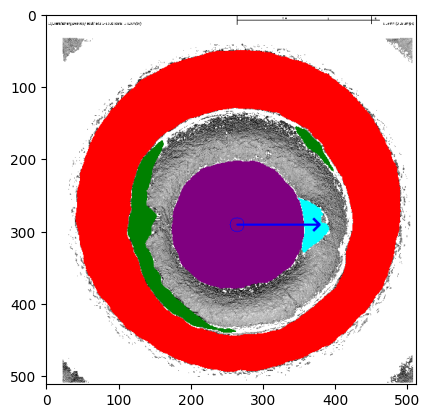

('Fadul 5-2 3DVM.png',)


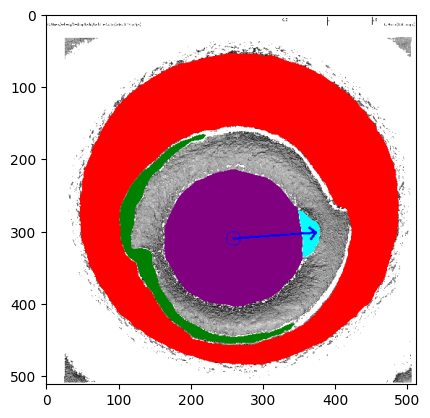

('Fadul 5-1 3DVM.png',)


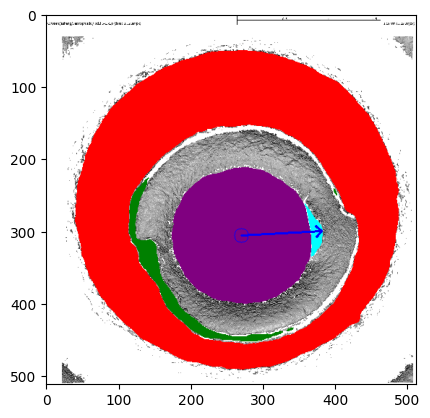

('Fadul S 3DVM.png',)


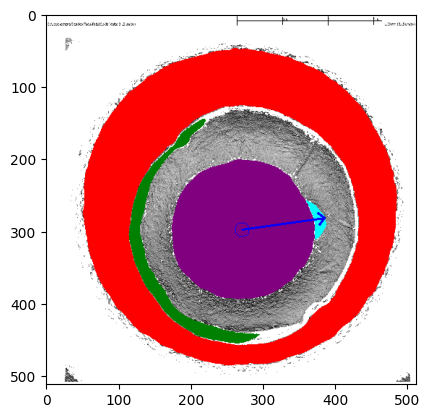

In [ ]:
evaluater.evaluate(
    dataset_dir = dataset_path,    # Path to the dataset directory
    dataset_name = 'test',         # Name of the dataset (e.g., 'test' indicating the test set)
    conf = 0.5,                    # Confidence threshold for prediction
    visualize = True               # Flag indicating whether to visualize the evaluation.
)

# <a id='3'>3. Model Output: Masked Cartride Case Image</a>

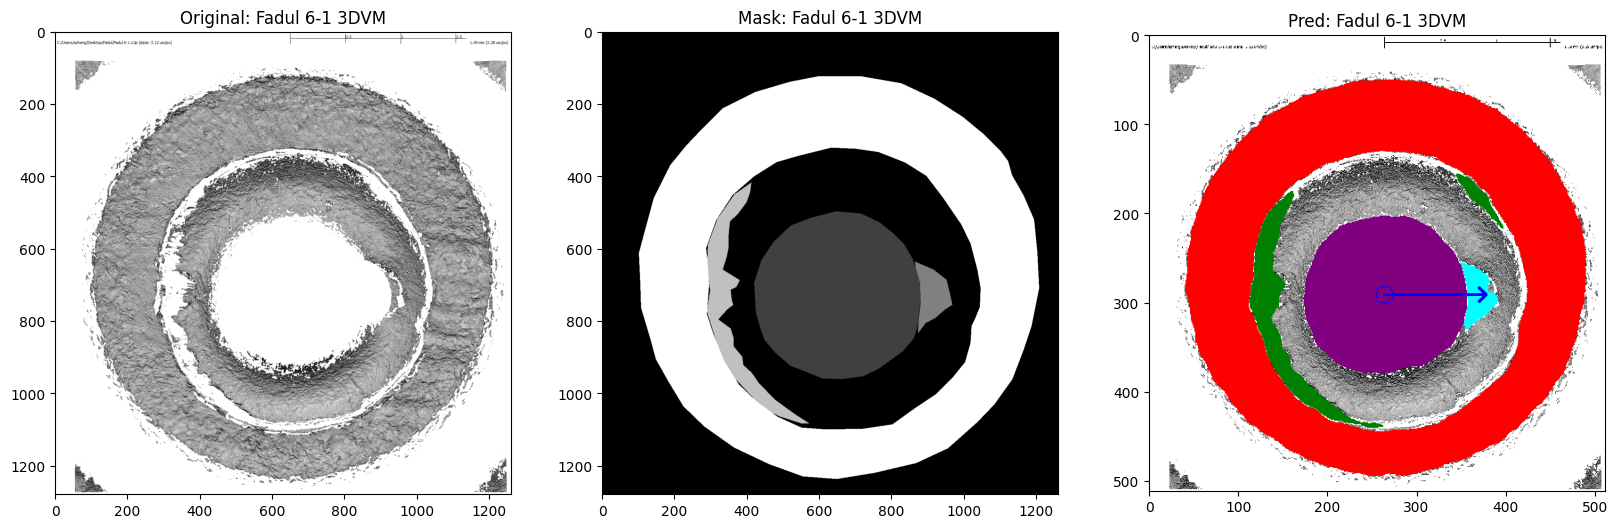

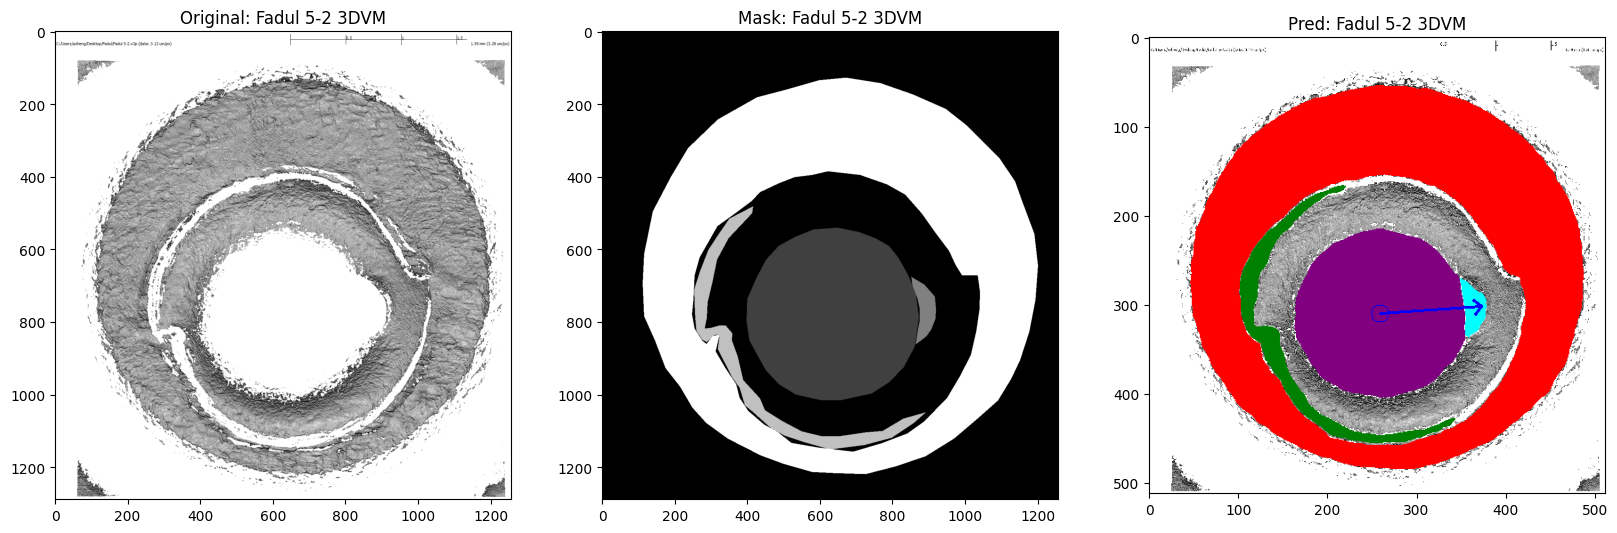

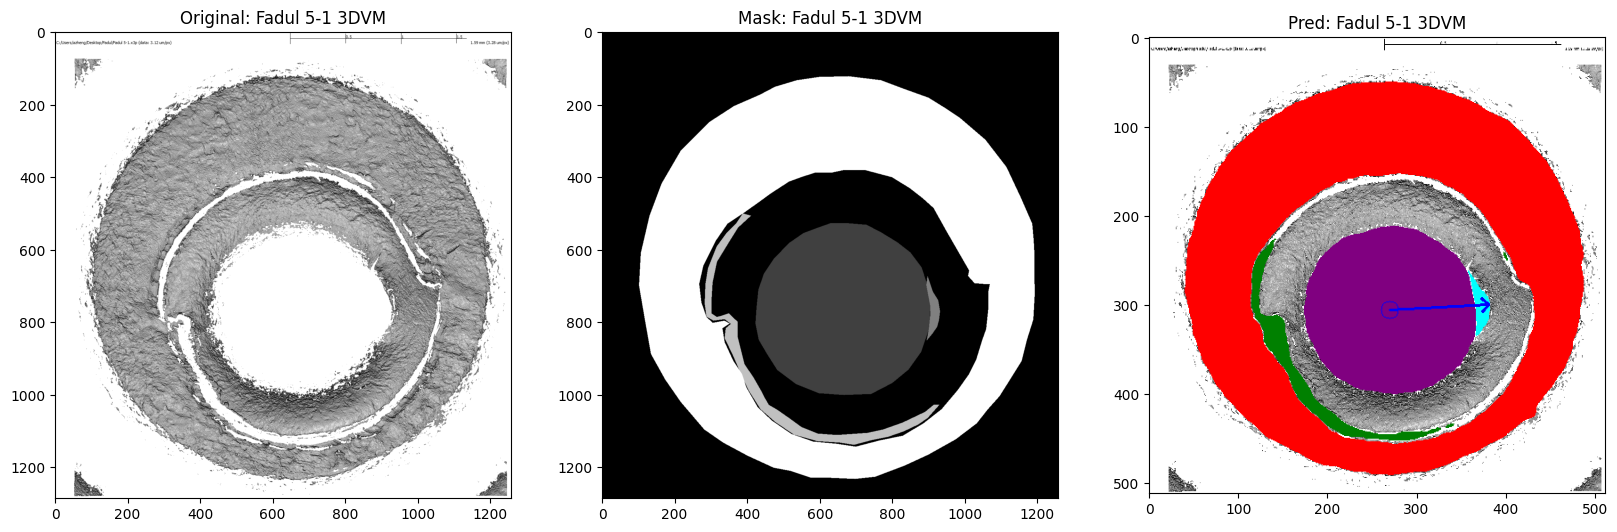

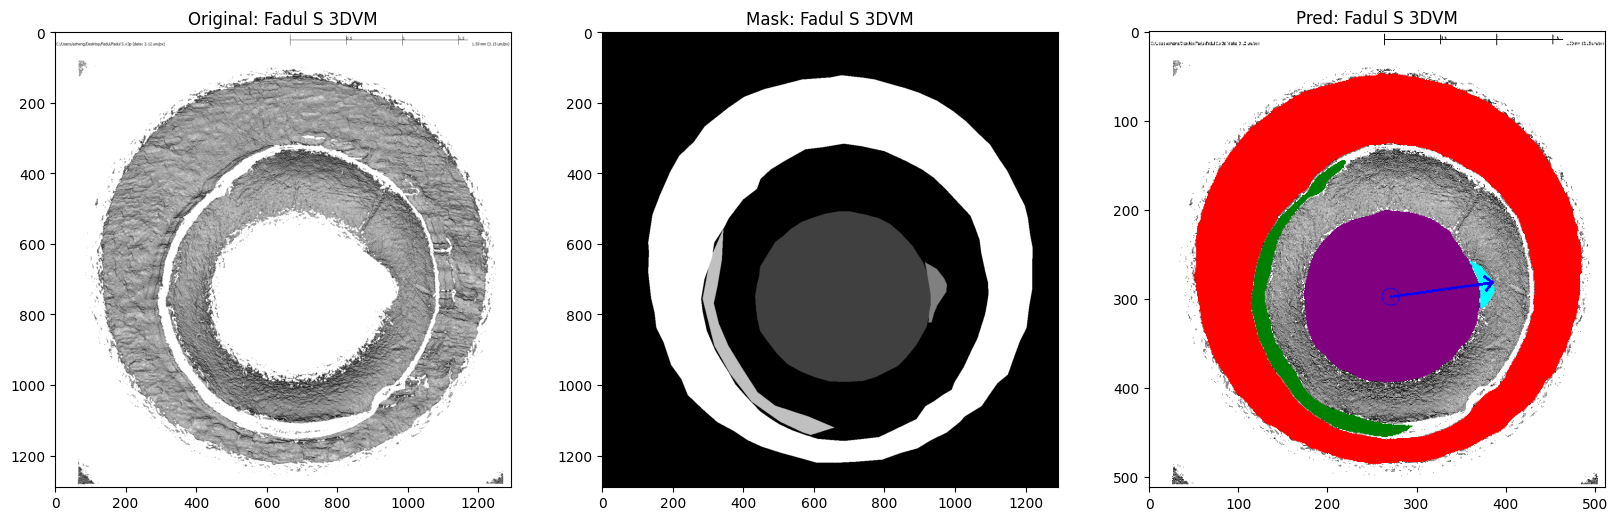

In [ ]:
img_gt_path = os.path.join(test_path,"images")
mask_gt_path = os.path.join(test_path,"masks")
mask_pred_path = os.path.join(test_path,"pred",selected_model_dir.split("/dump/")[1])

for name in [x for x in os.listdir(img_gt_path) if x.endswith('.png')]:

  name = name.split('.png')[0]
  # Load the image
  img = cv2.imread(os.path.join(img_gt_path, name + ".png"), cv2.IMREAD_GRAYSCALE)
  # Load the ground truth mask
  mask_img = cv2.imread(os.path.join(mask_gt_path, name + "_mask.png"), cv2.IMREAD_GRAYSCALE)
  # Load the pred image
  pred_img = mpimg.imread(os.path.join(mask_pred_path, name + ".png"))


  # print(os.path.join(img_gt_path, name + ".png"))
  # Create a new figure with two subplots

  fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20, 15))

  # Display the original image
  ax1.imshow(img, cmap='gray')
  ax1.set_title('Original: ' + name)

  # Display the mask image
  ax2.imshow(mask_img, cmap='gray')  # Assuming mask images are grayscale
  ax2.set_title('Mask: ' + name)

  # Display the pred image
  ax3.imshow(pred_img)
  ax3.set_title('Pred: ' + name)

  plt.show()